In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import os
import math, numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import cv2
from sklearn.metrics import confusion_matrix
from PIL import Image
from io import BytesIO
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/largedatasetPH'

/content/drive/MyDrive/largedatasetPH


In [ ]:
!1s

a1.m  a2.m  a3.m  testingdata  traindata  validationdata


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

# Flow training images using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/largedatasetPH/traindata',  # This is the source directory for training images
        target_size=(160,160), # All images will be resized to 160x160
        batch_size=21,
        # Since we use categorical_crossentropy loss, we need multiple labels
        class_mode='categorical')

# Flow validation images using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/largedatasetPH/validationdata',  # This is the source directory for validation images
        target_size=(160,160), #All images will be resized to 160x160
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need multiple labels
        class_mode='categorical')

# Flow test images using test_datagen generator
test_generator = test_datagen.flow_from_directory(
      '/content/drive/MyDrive/largedatasetPH/testingdata',  # This is the source directory for test images
        target_size=(160,160), #All images will be resized to 160x160
        batch_size=23,
        # Since we use categorical_crossentropy loss, we need multiple labels
        class_mode='categorical')

Found 1700 images belonging to 5 classes.
Found 340 images belonging to 5 classes.
Found 226 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(160,160,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(5, activation='linear')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.0003,name='Adam'), loss='mse', metrics=['mse','mae'])

In [ ]:
# Train/fit the model using the training and validation set.

history = model.fit_generator(
      train_generator,
      steps_per_epoch=81,
      epochs=10,
      validation_data = validation_generator,
      validation_steps=17,
      verbose=2)

<ipython-input-11-f2ee68c3b508>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
81/81 - 331s - loss: 0.1652 - mse: 0.1652 - mae: 0.3105 - val_loss: 0.1608 - val_mse: 0.1608 - val_mae: 0.3188 - 331s/epoch - 4s/step
Epoch 2/10
81/81 - 64s - loss: 0.1573 - mse: 0.1573 - mae: 0.3147 - val_loss: 0.1582 - val_mse: 0.1582 - val_mae: 0.3047 - 64s/epoch - 795ms/step
Epoch 3/10
81/81 - 58s - loss: 0.1490 - mse: 0.1490 - mae: 0.3022 - val_loss: 0.1522 - val_mse: 0.1522 - val_mae: 0.3091 - 58s/epoch - 713ms/step
Epoch 4/10
81/81 - 62s - loss: 0.1421 - mse: 0.1421 - mae: 0.2920 - val_loss: 0.1492 - val_mse: 0.1492 - val_mae: 0.3015 - 62s/epoch - 768ms/step
Epoch 5/10
81/81 - 50s - loss: 0.1375 - mse: 0.1375 - mae: 0.2861 - val_loss: 0.1473 - val_mse: 0.1473 - val_mae: 0.2938 - 50s/epoch - 615ms/step
Epoch 6/10
81/81 - 75s - loss: 0.1349 - mse: 0.1349 - mae: 0.2807 - val_loss: 0.1473 - val_mse: 0.1473 - val_mae: 0.3048 - 75s/epoch - 926ms/step
Epoch 7/10
81/81 - 71s - loss: 0.1339 - mse: 0.1339 - mae: 0.2775 - val_loss: 0.1439 - val_mse: 0.1439 - val_mae: 0.2947 - 71

Text(0, 0.5, 'Loss')

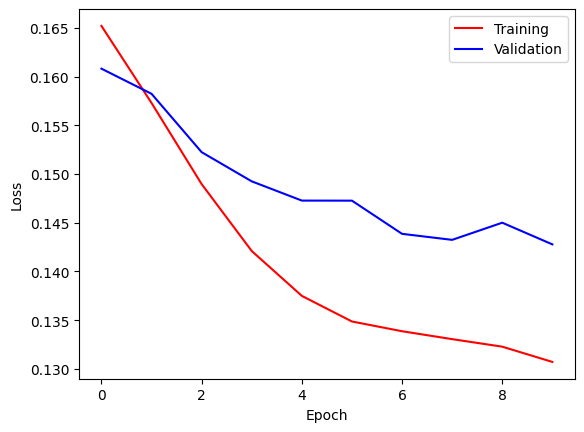

In [ ]:
# Plot the Training and Validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch = range(len(loss))

plt.figure()

plt.plot(Epoch, loss, 'r', label='Training loss')
plt.plot(Epoch, val_loss, 'b', label='Validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'mse')

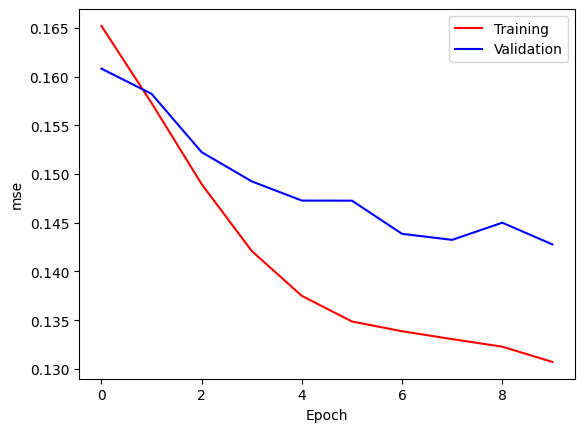

In [ ]:
# Plot the Training and Validation mse
mse = history.history['mse']
val_mse = history.history['val_mse']

Epoch = range(len(mse))

plt.figure()

plt.plot(Epoch, mse, 'r', label='Training mse')
plt.plot(Epoch, val_mse, 'b', label='Validation mse')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('mse')

Text(0, 0.5, 'mae')

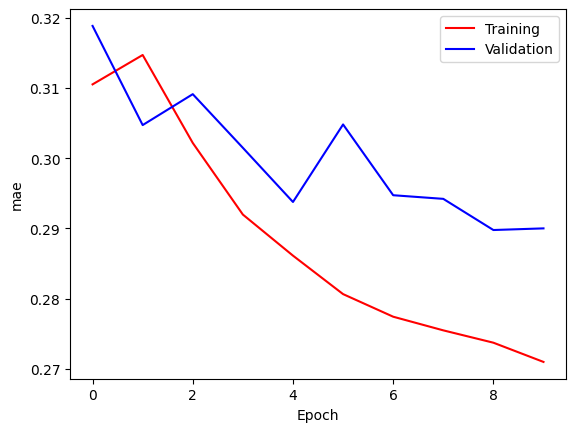

In [ ]:
# Plot the Training and Validation mae
mae = history.history['mae']
val_mae = history.history['val_mae']

Epoch = range(len(mae))

plt.figure()

plt.plot(Epoch, mae, 'r', label='Training')
plt.plot(Epoch, val_mae, 'b', label='Validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('mae')

Text(0, 0.5, 'Loss and mse and mae')

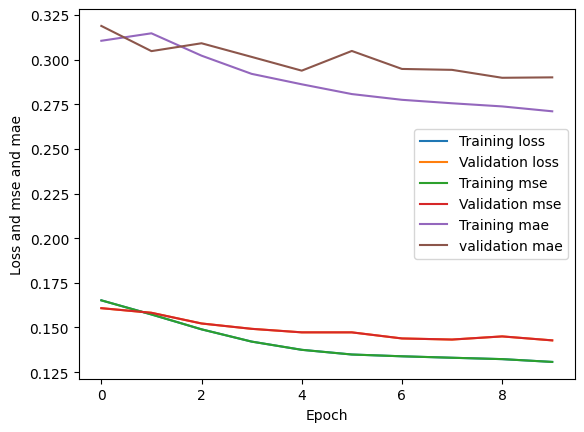

In [ ]:
# Plot the Training and Validation loss , mse and mae
loss = history.history['loss']
val_loss = history.history['val_loss']
mse = history.history['mse']
val_mse = history.history['val_mse']
mae=history.history['mae']
val_mae = history.history['val_mae']

Epoch = range(len(loss))

plt.figure()

plt.plot(Epoch, loss, label='Training loss')
plt.plot(Epoch, val_loss, label='Validation loss')
plt.plot(Epoch, mse, label='Training mse')
plt.plot(Epoch, val_mse , label='Validation mse')
plt.plot(Epoch, mae, label= 'Training mae')
plt.plot(Epoch, val_mae, label= 'validation mae')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss and mse and mae')

In [ ]:
testresult=model.evaluate(test_generator)

10/10 [==============================] - 37s 4s/step - loss: 0.1622 - mse: 0.1622 - mae: 0.2917


In [ ]:
x_train,y_train=next(train_generator)

In [ ]:
x_val,y_val=next(validation_generator)

In [ ]:
x_test,y_test=next(test_generator)

In [ ]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_val))
print(np.shape(y_val))
print(np.shape(x_test))
print(np.shape(y_test))

(21, 160, 160, 3)
(21, 5)
(20, 160, 160, 3)
(20, 5)
(23, 160, 160, 3)
(23, 5)


In [ ]:
y_true=y_test
print(y_true)
print(np.shape(y_true))

[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
(23, 5)


In [ ]:
y_pred=model.predict(x_test)
print(y_pred)
print(np.shape(y_pred))

1/1 [==============================] - 0s 277ms/step
[[ 0.08797663  0.8314718  -0.04568015  0.00304323  0.02624518]
 [ 0.1389129   0.7136681  -0.07212432 -0.04192946  0.04799462]
 [ 0.25747156  0.01818045  0.28535107  0.2603502   0.24208856]
 [ 0.06152423  0.7658386  -0.02081118  0.02917504  0.01472724]
 [ 0.02237388 -0.0925495   0.35473844  0.38583076  0.32940128]
 [ 0.1549787   0.6079173   0.05517184  0.0779165   0.07319792]
 [ 0.26949435  0.14337951  0.20622183  0.18210652  0.19494319]
 [ 0.2344856   0.15470627  0.23265973  0.21942045  0.21407479]
 [ 0.2972498   0.06006638  0.23549804  0.20603311  0.27668422]
 [ 0.39428735  0.17702405  0.08710026  0.03174811  0.16298486]
 [ 0.24182779  0.23344892  0.19200157  0.17984657  0.18913569]
 [ 0.06662377  0.5255836   0.07947458  0.12069792  0.10773192]
 [ 0.08797663  0.8314718  -0.04568015  0.00304323  0.02624518]
 [ 0.08847507  0.9721292  -0.04534857  0.01266077  0.02636368]
 [ 0.29473177  0.00603929  0.2847644   0.24886829  0.22648737]
 [

In [ ]:
yt_true=y_true.astype(int)
print(yt_true)
print(np.shape(yt_true))

[[0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]
(23, 5)


In [ ]:
yp_pred=np.round(y_pred)
print(yp_pred)
print(np.shape(yp_pred))

[[ 0.  1. -0.  0.  0.]
 [ 0.  1. -0. -0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. -0. -0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]]
(23, 5)


In [ ]:
y_true1=y_val
print(y_true1)
print(np.shape(y_true1))

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
(20, 5)


In [ ]:
y_pred1=model.predict(x_val)
print(y_pred1)
print(np.shape(y_pred1))

1/1 [==============================] - 0s 117ms/step
[[ 2.73565978e-01  3.40265594e-02  2.57248431e-01  2.31243402e-01
   2.68268377e-01]
 [ 2.67417103e-01 -1.42312674e-02  2.99517751e-01  2.68705130e-01
   2.23820657e-01]
 [ 2.66929090e-01 -5.07453345e-02  3.52679342e-01  3.20031494e-01
   2.22438782e-01]
 [ 2.73172408e-01 -5.96404858e-02  3.65319073e-01  3.30239862e-01
   2.16154546e-01]
 [ 2.85615712e-01  4.62778471e-02  2.48310164e-01  2.20588714e-01
   2.73643792e-01]
 [ 3.05997521e-01  8.07866976e-02  2.05607891e-01  1.74642652e-01
   2.70717472e-01]
 [ 3.36887598e-01  8.20861086e-02  2.25073829e-01  1.87861636e-01
   2.80556977e-01]
 [ 2.51252383e-01  4.27295901e-02  2.18909770e-01  1.96455941e-01
   2.44327128e-01]
 [ 3.33341897e-01  6.08668439e-02  2.51786649e-01  2.13895887e-01
   2.75467247e-01]
 [ 2.57471561e-01  1.81804486e-02  2.85351068e-01  2.60350198e-01
   2.42088556e-01]
 [ 2.76043057e-01  3.65158282e-02  2.55602837e-01  2.29265034e-01
   2.69624293e-01]
 [ 2.9179003

In [ ]:
yt_true1=y_true1.astype(int)
print(yt_true1)
print(np.shape(yt_true1))

[[1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]
(20, 5)


In [ ]:
yp_pred1=np.round(y_pred1)
print(yp_pred1)
print(np.shape(yp_pred1))

[[ 0.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0. -0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
(20, 5)


In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,explained_variance_score


cm1=mean_absolute_error(yt_true,yp_pred)
cm2=r2_score(yt_true,yp_pred)
cm3=explained_variance_score(yt_true,yp_pred)
print(cm1)
print(cm2)
print(cm3)

0.2260869565217391
-0.44590643274853825
-0.15789473684210523


In [ ]:
cm4=mean_absolute_error(yt_true1,yp_pred1)
cm5=r2_score(yt_true1,yp_pred1)
cm6=explained_variance_score(yt_true1,yp_pred1)
print(cm4)
print(cm5)
print(cm6)

0.19
-0.19380252100840348
0.04062500000000002


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
training_images=np.reshape(x_train,(x_train.shape[0],-1))
print(training_images)
print(training_images.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(21, 76800)


In [ ]:
validation_images=np.reshape(x_val,(x_val.shape[0],-1))
print(validation_images)
print(validation_images.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(20, 76800)


In [ ]:
testing_images=np.reshape(x_test,(x_test.shape[0],-1))
print(testing_images)
print(testing_images.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(23, 76800)


In [ ]:
training_labels=y_train
print(training_labels)
print(training_labels.shape)

[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
(21, 5)


In [ ]:
validation_labels=y_val
print(validation_labels)
print(validation_labels.shape)

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
(20, 5)


In [ ]:
testing_labels=y_test
print(testing_labels)
print(testing_labels.shape)

[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
(23, 5)


In [ ]:
knnrg=KNeighborsRegressor(n_neighbors=5)
knnrg.fit(training_images,training_labels)


KNeighborsRegressor()

In [ ]:
y_true2=y_test
print(y_true2)
print(np.shape(y_true2))

[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
(23, 5)


In [ ]:
y_pred2=model.predict(x_test)
print(y_pred2)
print(np.shape(y_pred2))


1/1 [==============================] - 0s 136ms/step
[[ 0.08797663  0.8314718  -0.04568015  0.00304323  0.02624518]
 [ 0.1389129   0.7136681  -0.07212432 -0.04192946  0.04799462]
 [ 0.25747156  0.01818045  0.28535107  0.2603502   0.24208856]
 [ 0.06152423  0.7658386  -0.02081118  0.02917504  0.01472724]
 [ 0.02237388 -0.0925495   0.35473844  0.38583076  0.32940128]
 [ 0.1549787   0.6079173   0.05517184  0.0779165   0.07319792]
 [ 0.26949435  0.14337951  0.20622183  0.18210652  0.19494319]
 [ 0.2344856   0.15470627  0.23265973  0.21942045  0.21407479]
 [ 0.2972498   0.06006638  0.23549804  0.20603311  0.27668422]
 [ 0.39428735  0.17702405  0.08710026  0.03174811  0.16298486]
 [ 0.24182779  0.23344892  0.19200157  0.17984657  0.18913569]
 [ 0.06662377  0.5255836   0.07947458  0.12069792  0.10773192]
 [ 0.08797663  0.8314718  -0.04568015  0.00304323  0.02624518]
 [ 0.08847507  0.9721292  -0.04534857  0.01266077  0.02636368]
 [ 0.29473177  0.00603929  0.2847644   0.24886829  0.22648737]
 [

In [ ]:
yt_true2=y_true2.astype(int)
print(yt_true2)
print(np.shape(yt_true2))

[[0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]
(23, 5)


In [ ]:
yp_pred2=np.round(y_pred2)
print(yp_pred2)
print(np.shape(y_pred2))

[[ 0.  1. -0.  0.  0.]
 [ 0.  1. -0. -0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. -0. -0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]]
(23, 5)


In [ ]:
y_true3=y_val
print(y_true3)
print(np.shape(y_true3))

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
(20, 5)


In [ ]:
y_pred3=model.predict(x_val)
print(y_pred3)
print(np.shape(y_pred3))


1/1 [==============================] - 0s 117ms/step
[[ 2.73565978e-01  3.40265594e-02  2.57248431e-01  2.31243402e-01
   2.68268377e-01]
 [ 2.67417103e-01 -1.42312674e-02  2.99517751e-01  2.68705130e-01
   2.23820657e-01]
 [ 2.66929090e-01 -5.07453345e-02  3.52679342e-01  3.20031494e-01
   2.22438782e-01]
 [ 2.73172408e-01 -5.96404858e-02  3.65319073e-01  3.30239862e-01
   2.16154546e-01]
 [ 2.85615712e-01  4.62778471e-02  2.48310164e-01  2.20588714e-01
   2.73643792e-01]
 [ 3.05997521e-01  8.07866976e-02  2.05607891e-01  1.74642652e-01
   2.70717472e-01]
 [ 3.36887598e-01  8.20861086e-02  2.25073829e-01  1.87861636e-01
   2.80556977e-01]
 [ 2.51252383e-01  4.27295901e-02  2.18909770e-01  1.96455941e-01
   2.44327128e-01]
 [ 3.33341897e-01  6.08668439e-02  2.51786649e-01  2.13895887e-01
   2.75467247e-01]
 [ 2.57471561e-01  1.81804486e-02  2.85351068e-01  2.60350198e-01
   2.42088556e-01]
 [ 2.76043057e-01  3.65158282e-02  2.55602837e-01  2.29265034e-01
   2.69624293e-01]
 [ 2.9179003

In [ ]:
yt_true3=y_true3.astype(int)
print(yt_true3)
print(np.shape(yt_true3))

[[1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]
(20, 5)


In [ ]:
yp_pred3=np.round(y_pred3)
print(yp_pred3)
print(np.shape(y_pred3))

[[ 0.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0. -0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
(20, 5)


In [ ]:
cm7=mean_absolute_error(yt_true2,yp_pred2)
cm8=r2_score(yt_true2,yp_pred2)
cm9=explained_variance_score(yt_true2,yp_pred2)
print(cm7)
print(cm8)
print(cm9)

0.2260869565217391
-0.44590643274853825
-0.15789473684210523


In [ ]:
cm10=mean_absolute_error(yt_true3,yp_pred3)
cm11=r2_score(yt_true3,yp_pred3)
cm12=explained_variance_score(yt_true3,yp_pred3)
print(cm10)
print(cm11)
print(cm12)

0.19
-0.19380252100840348
0.04062500000000002


In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlprg=MLPRegressor(hidden_layer_sizes=5,activation='relu',solver='adam',alpha=0.0003,learning_rate='constant',learning_rate_init=0.0003,random_state=1,max_iter=10)
mlprg.fit(training_images,training_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.0003, hidden_layer_sizes=5, learning_rate_init=0.0003,
             max_iter=10, random_state=1)

In [ ]:
y_true4=y_test
print(y_true4)
print(np.shape(y_true4))

[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
(23, 5)


In [ ]:
y_pred4=model.predict(x_test)
print(y_pred4)
print(np.shape(y_pred4))

1/1 [==============================] - 0s 228ms/step
[[ 0.08797663  0.8314718  -0.04568015  0.00304323  0.02624518]
 [ 0.1389129   0.7136681  -0.07212432 -0.04192946  0.04799462]
 [ 0.25747156  0.01818045  0.28535107  0.2603502   0.24208856]
 [ 0.06152423  0.7658386  -0.02081118  0.02917504  0.01472724]
 [ 0.02237388 -0.0925495   0.35473844  0.38583076  0.32940128]
 [ 0.1549787   0.6079173   0.05517184  0.0779165   0.07319792]
 [ 0.26949435  0.14337951  0.20622183  0.18210652  0.19494319]
 [ 0.2344856   0.15470627  0.23265973  0.21942045  0.21407479]
 [ 0.2972498   0.06006638  0.23549804  0.20603311  0.27668422]
 [ 0.39428735  0.17702405  0.08710026  0.03174811  0.16298486]
 [ 0.24182779  0.23344892  0.19200157  0.17984657  0.18913569]
 [ 0.06662377  0.5255836   0.07947458  0.12069792  0.10773192]
 [ 0.08797663  0.8314718  -0.04568015  0.00304323  0.02624518]
 [ 0.08847507  0.9721292  -0.04534857  0.01266077  0.02636368]
 [ 0.29473177  0.00603929  0.2847644   0.24886829  0.22648737]
 [

In [ ]:
yt_true4=y_true4.astype(int)
print(yt_true4)
print(np.shape(yt_true4))

[[0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]
(23, 5)


In [ ]:
yp_pred4=np.round(y_pred4)
print(yp_pred4)
print(np.shape(y_pred4))

[[ 0.  1. -0.  0.  0.]
 [ 0.  1. -0. -0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. -0. -0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]]
(23, 5)


In [ ]:
y_true5=y_val
print(y_true5)
print(np.shape(y_true5))

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
(20, 5)


In [ ]:
y_pred5=model.predict(x_val)
print(y_pred5)
print(np.shape(y_pred5))


1/1 [==============================] - 0s 204ms/step
[[ 2.73565978e-01  3.40265594e-02  2.57248431e-01  2.31243402e-01
   2.68268377e-01]
 [ 2.67417103e-01 -1.42312674e-02  2.99517751e-01  2.68705130e-01
   2.23820657e-01]
 [ 2.66929090e-01 -5.07453345e-02  3.52679342e-01  3.20031494e-01
   2.22438782e-01]
 [ 2.73172408e-01 -5.96404858e-02  3.65319073e-01  3.30239862e-01
   2.16154546e-01]
 [ 2.85615712e-01  4.62778471e-02  2.48310164e-01  2.20588714e-01
   2.73643792e-01]
 [ 3.05997521e-01  8.07866976e-02  2.05607891e-01  1.74642652e-01
   2.70717472e-01]
 [ 3.36887598e-01  8.20861086e-02  2.25073829e-01  1.87861636e-01
   2.80556977e-01]
 [ 2.51252383e-01  4.27295901e-02  2.18909770e-01  1.96455941e-01
   2.44327128e-01]
 [ 3.33341897e-01  6.08668439e-02  2.51786649e-01  2.13895887e-01
   2.75467247e-01]
 [ 2.57471561e-01  1.81804486e-02  2.85351068e-01  2.60350198e-01
   2.42088556e-01]
 [ 2.76043057e-01  3.65158282e-02  2.55602837e-01  2.29265034e-01
   2.69624293e-01]
 [ 2.9179003

In [ ]:
yt_true5=y_true5.astype(int)
print(yt_true5)
print(np.shape(yt_true5))

[[1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]
(20, 5)


In [ ]:
yp_pred5=np.round(y_pred5)
print(yp_pred5)
print(np.shape(y_pred5))

[[ 0.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0. -0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
(20, 5)


In [ ]:
cm12=mean_absolute_error(yt_true4,yp_pred4)
cm13=r2_score(yt_true4,yp_pred4)
cm14=explained_variance_score(yt_true4,yp_pred4)
print(cm12)
print(cm13)
print(cm14)

0.2260869565217391
-0.44590643274853825
-0.15789473684210523


In [ ]:
cm15=mean_absolute_error(yt_true5,yp_pred5)
cm16=r2_score(yt_true5,yp_pred5)
cm17=explained_variance_score(yt_true5,yp_pred5)
print(cm15)
print(cm16)
print(cm17)

0.19
-0.19380252100840348
0.04062500000000002


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtrg=DecisionTreeRegressor(max_depth=2)
dtrg.fit(training_images,training_labels)

DecisionTreeRegressor(max_depth=2)

In [ ]:
y_true6=y_test
print(y_true6)
print(np.shape(y_true6))

[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
(23, 5)


In [ ]:
y_pred6=model.predict(x_test)
print(y_pred6)
print(np.shape(y_pred6))

1/1 [==============================] - 0s 136ms/step
[[ 0.08797663  0.8314718  -0.04568015  0.00304323  0.02624518]
 [ 0.1389129   0.7136681  -0.07212432 -0.04192946  0.04799462]
 [ 0.25747156  0.01818045  0.28535107  0.2603502   0.24208856]
 [ 0.06152423  0.7658386  -0.02081118  0.02917504  0.01472724]
 [ 0.02237388 -0.0925495   0.35473844  0.38583076  0.32940128]
 [ 0.1549787   0.6079173   0.05517184  0.0779165   0.07319792]
 [ 0.26949435  0.14337951  0.20622183  0.18210652  0.19494319]
 [ 0.2344856   0.15470627  0.23265973  0.21942045  0.21407479]
 [ 0.2972498   0.06006638  0.23549804  0.20603311  0.27668422]
 [ 0.39428735  0.17702405  0.08710026  0.03174811  0.16298486]
 [ 0.24182779  0.23344892  0.19200157  0.17984657  0.18913569]
 [ 0.06662377  0.5255836   0.07947458  0.12069792  0.10773192]
 [ 0.08797663  0.8314718  -0.04568015  0.00304323  0.02624518]
 [ 0.08847507  0.9721292  -0.04534857  0.01266077  0.02636368]
 [ 0.29473177  0.00603929  0.2847644   0.24886829  0.22648737]
 [

In [ ]:
yt_true6=y_true6.astype(int)
print(yt_true6)
print(np.shape(yt_true6))

[[0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]
(23, 5)


In [ ]:
yp_pred6=np.round(y_pred6)
print(yp_pred6)
print(np.shape(y_pred6))

[[ 0.  1. -0.  0.  0.]
 [ 0.  1. -0. -0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. -0. -0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]]
(23, 5)


In [ ]:
y_true7=y_val
print(y_true7)
print(np.shape(y_true7))

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
(20, 5)


In [ ]:
y_pred7=model.predict(x_val)
print(y_pred7)
print(np.shape(y_pred7))

1/1 [==============================] - 0s 123ms/step
[[ 2.73565978e-01  3.40265594e-02  2.57248431e-01  2.31243402e-01
   2.68268377e-01]
 [ 2.67417103e-01 -1.42312674e-02  2.99517751e-01  2.68705130e-01
   2.23820657e-01]
 [ 2.66929090e-01 -5.07453345e-02  3.52679342e-01  3.20031494e-01
   2.22438782e-01]
 [ 2.73172408e-01 -5.96404858e-02  3.65319073e-01  3.30239862e-01
   2.16154546e-01]
 [ 2.85615712e-01  4.62778471e-02  2.48310164e-01  2.20588714e-01
   2.73643792e-01]
 [ 3.05997521e-01  8.07866976e-02  2.05607891e-01  1.74642652e-01
   2.70717472e-01]
 [ 3.36887598e-01  8.20861086e-02  2.25073829e-01  1.87861636e-01
   2.80556977e-01]
 [ 2.51252383e-01  4.27295901e-02  2.18909770e-01  1.96455941e-01
   2.44327128e-01]
 [ 3.33341897e-01  6.08668439e-02  2.51786649e-01  2.13895887e-01
   2.75467247e-01]
 [ 2.57471561e-01  1.81804486e-02  2.85351068e-01  2.60350198e-01
   2.42088556e-01]
 [ 2.76043057e-01  3.65158282e-02  2.55602837e-01  2.29265034e-01
   2.69624293e-01]
 [ 2.9179003

In [ ]:
yt_true7=y_true7.astype(int)
print(yt_true7)
print(np.shape(yt_true7))

[[1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]
(20, 5)


In [ ]:
yp_pred7=np.round(y_pred7)
print(yp_pred7)
print(np.shape(y_pred7))

[[ 0.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0. -0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
(20, 5)


In [ ]:
cm18=mean_absolute_error(yt_true6,yp_pred6)
cm19=r2_score(yt_true6,yp_pred6)
cm20=explained_variance_score(yt_true6,yp_pred6)
print(cm18)
print(cm19)
print(cm20)

0.2260869565217391
-0.44590643274853825
-0.15789473684210523


In [ ]:
cm21=mean_absolute_error(yt_true7,yp_pred7)
cm22=r2_score(yt_true7,yp_pred7)
cm23=explained_variance_score(yt_true7,yp_pred7)
print(cm21)
print(cm22)
print(cm23)

0.19
-0.19380252100840348
0.04062500000000002


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfrg=RandomForestRegressor(n_estimators=10,max_depth=None,min_samples_split=2)
rfrg.fit(training_images,training_labels)

RandomForestRegressor(n_estimators=10)

In [ ]:
y_true8=y_test
print(y_true8)
print(np.shape(y_true8))

[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
(23, 5)


In [ ]:
y_pred8=model.predict(x_test)
print(y_pred8)
print(np.shape(y_pred8))

1/1 [==============================] - 0s 256ms/step
[[ 0.08797663  0.8314718  -0.04568015  0.00304323  0.02624518]
 [ 0.1389129   0.7136681  -0.07212432 -0.04192946  0.04799462]
 [ 0.25747156  0.01818045  0.28535107  0.2603502   0.24208856]
 [ 0.06152423  0.7658386  -0.02081118  0.02917504  0.01472724]
 [ 0.02237388 -0.0925495   0.35473844  0.38583076  0.32940128]
 [ 0.1549787   0.6079173   0.05517184  0.0779165   0.07319792]
 [ 0.26949435  0.14337951  0.20622183  0.18210652  0.19494319]
 [ 0.2344856   0.15470627  0.23265973  0.21942045  0.21407479]
 [ 0.2972498   0.06006638  0.23549804  0.20603311  0.27668422]
 [ 0.39428735  0.17702405  0.08710026  0.03174811  0.16298486]
 [ 0.24182779  0.23344892  0.19200157  0.17984657  0.18913569]
 [ 0.06662377  0.5255836   0.07947458  0.12069792  0.10773192]
 [ 0.08797663  0.8314718  -0.04568015  0.00304323  0.02624518]
 [ 0.08847507  0.9721292  -0.04534857  0.01266077  0.02636368]
 [ 0.29473177  0.00603929  0.2847644   0.24886829  0.22648737]
 [

In [ ]:
yt_true8=y_true8.astype(int)
print(yt_true8)
print(np.shape(yt_true8))

[[0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]
(23, 5)


In [ ]:
yp_pred8=np.round(y_pred8)
print(yp_pred8)
print(np.shape(y_pred8))

[[ 0.  1. -0.  0.  0.]
 [ 0.  1. -0. -0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. -0. -0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]]
(23, 5)


In [ ]:
y_true9=y_val
print(y_true9)
print(np.shape(y_true9))

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
(20, 5)


In [ ]:
y_pred9=model.predict(x_val)
print(y_pred9)
print(np.shape(y_pred9))

1/1 [==============================] - 0s 122ms/step
[[ 2.73565978e-01  3.40265594e-02  2.57248431e-01  2.31243402e-01
   2.68268377e-01]
 [ 2.67417103e-01 -1.42312674e-02  2.99517751e-01  2.68705130e-01
   2.23820657e-01]
 [ 2.66929090e-01 -5.07453345e-02  3.52679342e-01  3.20031494e-01
   2.22438782e-01]
 [ 2.73172408e-01 -5.96404858e-02  3.65319073e-01  3.30239862e-01
   2.16154546e-01]
 [ 2.85615712e-01  4.62778471e-02  2.48310164e-01  2.20588714e-01
   2.73643792e-01]
 [ 3.05997521e-01  8.07866976e-02  2.05607891e-01  1.74642652e-01
   2.70717472e-01]
 [ 3.36887598e-01  8.20861086e-02  2.25073829e-01  1.87861636e-01
   2.80556977e-01]
 [ 2.51252383e-01  4.27295901e-02  2.18909770e-01  1.96455941e-01
   2.44327128e-01]
 [ 3.33341897e-01  6.08668439e-02  2.51786649e-01  2.13895887e-01
   2.75467247e-01]
 [ 2.57471561e-01  1.81804486e-02  2.85351068e-01  2.60350198e-01
   2.42088556e-01]
 [ 2.76043057e-01  3.65158282e-02  2.55602837e-01  2.29265034e-01
   2.69624293e-01]
 [ 2.9179003

In [ ]:
yt_true9=y_true9.astype(int)
print(yt_true9)
print(np.shape(yt_true9))

[[1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]
(20, 5)


In [ ]:
yp_pred9=np.round(y_pred9)
print(yp_pred9)
print(np.shape(y_pred9))

[[ 0.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0. -0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
(20, 5)


In [ ]:
cm24=mean_absolute_error(yt_true8,yp_pred8)
cm25=r2_score(yt_true8,yp_pred8)
cm26=explained_variance_score(yt_true8,yp_pred8)
print(cm24)
print(cm25)
print(cm26)

0.2260869565217391
-0.44590643274853825
-0.15789473684210523


In [ ]:
cm27=mean_absolute_error(yt_true9,yp_pred9)
cm28=r2_score(yt_true9,yp_pred9)
cm29=explained_variance_score(yt_true9,yp_pred9)
print(cm27)
print(cm28)
print(cm29)

0.19
-0.19380252100840348
0.04062500000000002


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
etrg=ExtraTreesRegressor(n_estimators=10,max_depth=None,min_samples_split=2)
etrg.fit(training_images,training_labels)

ExtraTreesRegressor(n_estimators=10)

In [ ]:
y_true10=y_test
print(y_true10)
print(np.shape(y_true10))

[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
(23, 5)


In [ ]:
y_pred10=model.predict(x_test)
print(y_pred10)
print(np.shape(y_pred10))

1/1 [==============================] - 0s 265ms/step
[[ 0.08797663  0.8314718  -0.04568015  0.00304323  0.02624518]
 [ 0.1389129   0.7136681  -0.07212432 -0.04192946  0.04799462]
 [ 0.25747156  0.01818045  0.28535107  0.2603502   0.24208856]
 [ 0.06152423  0.7658386  -0.02081118  0.02917504  0.01472724]
 [ 0.02237388 -0.0925495   0.35473844  0.38583076  0.32940128]
 [ 0.1549787   0.6079173   0.05517184  0.0779165   0.07319792]
 [ 0.26949435  0.14337951  0.20622183  0.18210652  0.19494319]
 [ 0.2344856   0.15470627  0.23265973  0.21942045  0.21407479]
 [ 0.2972498   0.06006638  0.23549804  0.20603311  0.27668422]
 [ 0.39428735  0.17702405  0.08710026  0.03174811  0.16298486]
 [ 0.24182779  0.23344892  0.19200157  0.17984657  0.18913569]
 [ 0.06662377  0.5255836   0.07947458  0.12069792  0.10773192]
 [ 0.08797663  0.8314718  -0.04568015  0.00304323  0.02624518]
 [ 0.08847507  0.9721292  -0.04534857  0.01266077  0.02636368]
 [ 0.29473177  0.00603929  0.2847644   0.24886829  0.22648737]
 [

In [ ]:
yt_true10=y_true10.astype(int)
print(yt_true10)
print(np.shape(yt_true10))

[[0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]
(23, 5)


In [ ]:
yp_pred10=np.round(y_pred10)
print(yp_pred10)
print(np.shape(y_pred10))

[[ 0.  1. -0.  0.  0.]
 [ 0.  1. -0. -0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0.  1. -0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. -0. -0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0.  0.]]
(23, 5)


In [ ]:
y_true11=y_val
print(y_true11)
print(np.shape(y_true11))

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
(20, 5)


In [ ]:
y_pred11=model.predict(x_val)
print(y_pred11)
print(np.shape(y_pred11))

1/1 [==============================] - 0s 237ms/step
[[ 2.73565978e-01  3.40265594e-02  2.57248431e-01  2.31243402e-01
   2.68268377e-01]
 [ 2.67417103e-01 -1.42312674e-02  2.99517751e-01  2.68705130e-01
   2.23820657e-01]
 [ 2.66929090e-01 -5.07453345e-02  3.52679342e-01  3.20031494e-01
   2.22438782e-01]
 [ 2.73172408e-01 -5.96404858e-02  3.65319073e-01  3.30239862e-01
   2.16154546e-01]
 [ 2.85615712e-01  4.62778471e-02  2.48310164e-01  2.20588714e-01
   2.73643792e-01]
 [ 3.05997521e-01  8.07866976e-02  2.05607891e-01  1.74642652e-01
   2.70717472e-01]
 [ 3.36887598e-01  8.20861086e-02  2.25073829e-01  1.87861636e-01
   2.80556977e-01]
 [ 2.51252383e-01  4.27295901e-02  2.18909770e-01  1.96455941e-01
   2.44327128e-01]
 [ 3.33341897e-01  6.08668439e-02  2.51786649e-01  2.13895887e-01
   2.75467247e-01]
 [ 2.57471561e-01  1.81804486e-02  2.85351068e-01  2.60350198e-01
   2.42088556e-01]
 [ 2.76043057e-01  3.65158282e-02  2.55602837e-01  2.29265034e-01
   2.69624293e-01]
 [ 2.9179003

In [ ]:
yt_true11=y_true11.astype(int)
print(yt_true11)
print(np.shape(yt_true11))

[[1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]
(20, 5)


In [ ]:
yp_pred11=np.round(y_pred11)
print(yp_pred11)
print(np.shape(y_pred11))

[[ 0.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1. -0.  0. -0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
(20, 5)


In [ ]:
cm30=mean_absolute_error(yt_true10,yp_pred10)
cm31=r2_score(yt_true10,yp_pred10)
cm32=explained_variance_score(yt_true10,yp_pred10)
print(cm30)
print(cm31)
print(cm32)

0.2260869565217391
-0.44590643274853825
-0.15789473684210523


In [ ]:
cm33=mean_absolute_error(yt_true11,yp_pred11)
cm34=r2_score(yt_true11,yp_pred11)
cm35=explained_variance_score(yt_true11,yp_pred11)
print(cm33)
print(cm34)
print(cm35)

0.19
-0.19380252100840348
0.04062500000000002
